Creating Fake Data 

In [14]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200

Visualizing the Data

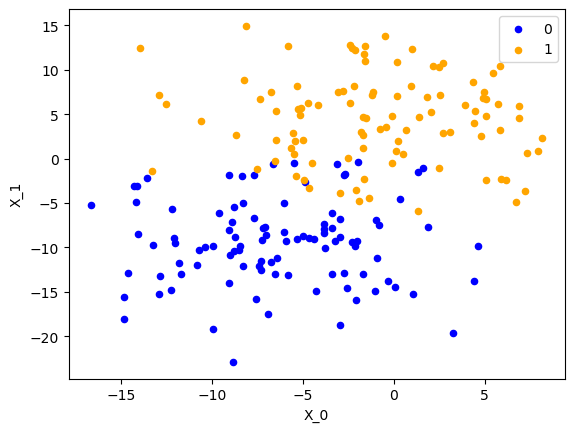

In [15]:
from matplotlib import pyplot as plt 
from pandas import DataFrame 

df = DataFrame(dict(x=X[:, 0], y=X[:,1], label=Y)) 
colors = {0:'blue', 1:'orange'} 
fig, ax = plt.subplots() 
grouped = df.groupby('label') 
for key, group in grouped: 
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]) 
plt.xlabel('X_0') 
plt.ylabel('X_1') 
plt.show() 

Logistic Model

In [16]:
import numpy as np 
def sigmoid(z): 
    return 1/(1+np.exp(z)) 

In [17]:
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:, 0]) + w[2]*np.array(X[:, 1])) 
    return sigmoid(z)

Cost Function - Binary Cross Entropy

In [18]:
def cost(w, X, y): 
    y_pred = hx(w,X) 
    return -1*sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred)) 

Gradient Descent

In [19]:
def grad(w, X, y): 
    y_pred = hx(w, X) 
    g = [0] * 3 
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:, 0] - (1-Y)*y_pred*X[:,0]) 
    g[2] = -1 * sum(Y*(1-y_pred)*X[:, 1] - (1-Y)*y_pred*X[:,1]) 
    return g 

In [20]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1

Initializing Parameters

In [21]:
w=[1,1,1] 

Training the model

In [22]:
w = descent(w,w,.0099)
print(w)

[1, 1, 1]
2056.603951805014
[0.7460577101411359, 7.919018230785898, 14.551269476181803]
nan
[0.5001221953162559, 14.441616867861987, 28.462517341299794]
nan
[0.2558352058764726, 20.88270795057687, 42.415975623336266]
nan
[0.015763915421786734, 27.187192091487717, 56.437654415718775]
nan
[-0.22238536351571422, 33.45876242154328, 70.47555346425531]
nan
[-0.4630293952309493, 39.71763330206323, 84.51944557309143]
nan
[-0.7084037549585283, 45.952488376944856, 98.57466994294934]
nan
[-0.9556298392119245, 52.1779422922816, 112.63433040717703]
nan
[-1.2031023216784003, 58.4021452090254, 126.69458117830986]
nan
[-1.450599645990153, 64.62622197977585, 140.7548914749153]
nan
[-1.6980993888140494, 70.85028646021983, 154.81520757155607]
nan
[-1.9455993650821644, 77.07434975025838, 168.87552423020168]
nan
[-2.193099363332632, 83.2984129263674, 182.93584094273712]
nan
[-2.4405993634098135, 89.52247609216728, 196.99615766019505]
nan
[-2.688099363527218, 95.7465392573026, 211.05647437799237]
nan
[-2.93

/var/folders/4w/hqv_yjbd1hzfd8yp7cbn87m40000gp/T/ipykernel_88009/929800573.py:3: RuntimeWarning: divide by zero encountered in log
  return -1*sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))
/var/folders/4w/hqv_yjbd1hzfd8yp7cbn87m40000gp/T/ipykernel_88009/929800573.py:3: RuntimeWarning: invalid value encountered in multiply
  return -1*sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))
/var/folders/4w/hqv_yjbd1hzfd8yp7cbn87m40000gp/T/ipykernel_88009/2960195744.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(z))


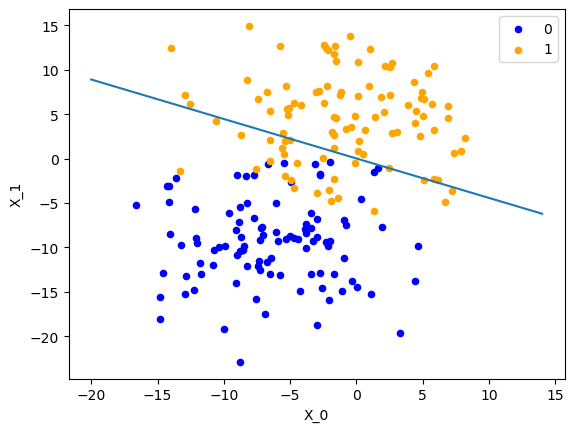

In [23]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()